# Análise Base Ataque Cardíaco

## Breve Explicação da Base

Essa base de dados é um conjunto de dados relacionados a pacientes com problemas cardíacos, com várias variáveis de entrada (ou recursos) e uma variável de saída (ou rótulo) indicando se o paciente possui ou não uma doença cardíaca. As colunas na base de dados representam as seguintes informações:

age: idade do paciente em anos (variável numérica) 

sex: gênero do paciente (1 para masculino, 0 para feminino) (variável categórica) 

cp: tipo de dor no peito relatada pelo paciente (variável categórica) 

trtbps: pressão arterial em repouso (em mm Hg) (variável numérica) 

chol: nível de colesterol sérico (em mg/dL) (variável numérica) 

fbs: nível de açúcar no sangue em jejum (> 120 mg/dL representa verdadeiro, 0 representa falso) (variável categórica) 

restecg: resultado do eletrocardiograma em repouso (variável categórica) 

thalachh: frequência cardíaca máxima alcançada (variável numérica) 

exng: angina induzida por exercício (1 representa verdadeiro, 0 representa falso) (variável categórica) 

oldpeak: depressão do segmento ST induzida por exercício em relação ao repouso (variável numérica) 

slp: inclinação do segmento ST de pico do exercício (variável categórica) 

caa: número de vasos principais coloridos por fluoroscopia (variável numérica) 

thall: resultado do teste de estresse com tálio (variável categórica) 

output: presença de doença cardíaca (1 representa verdadeiro, 0 representa falso) (variável categórica)

# Breve Visualização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Análise Univariada (uma variável)

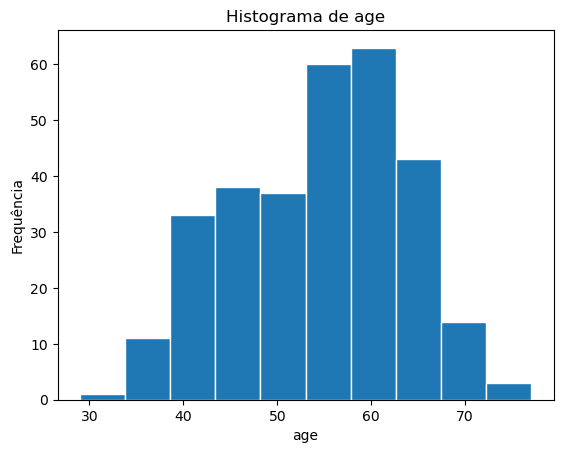

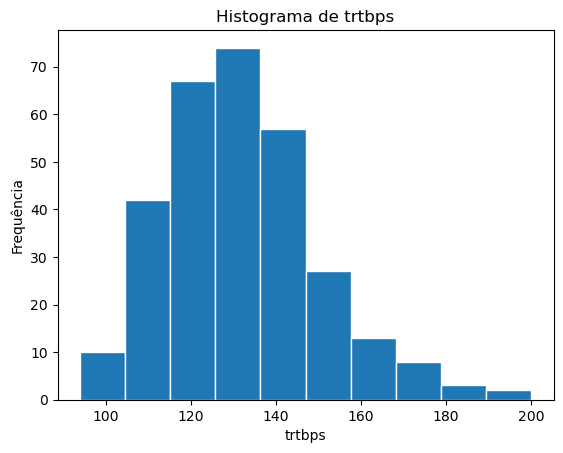

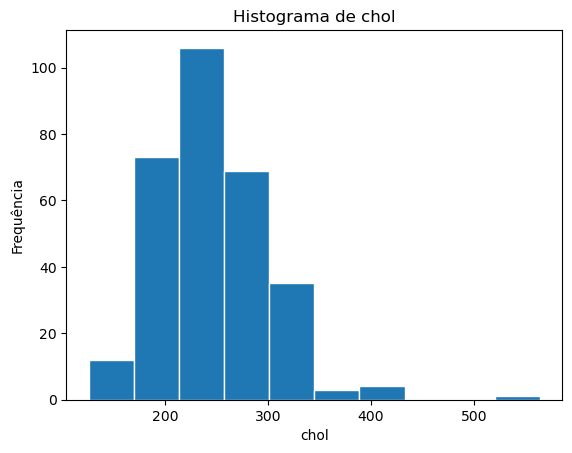

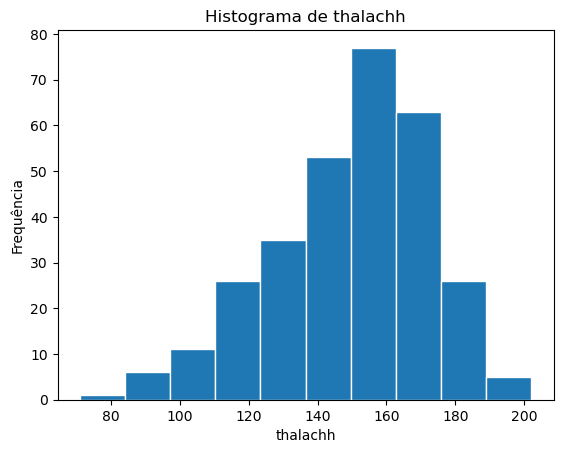

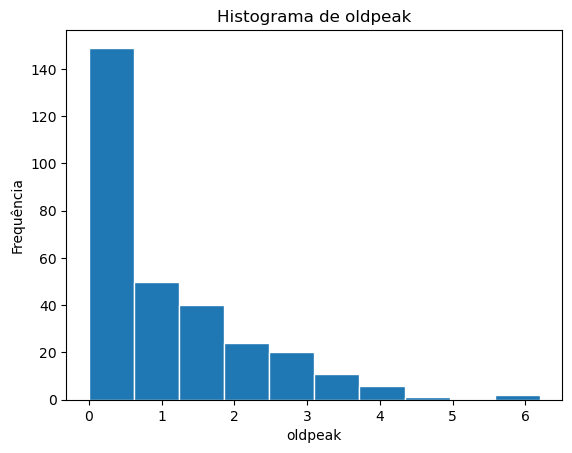

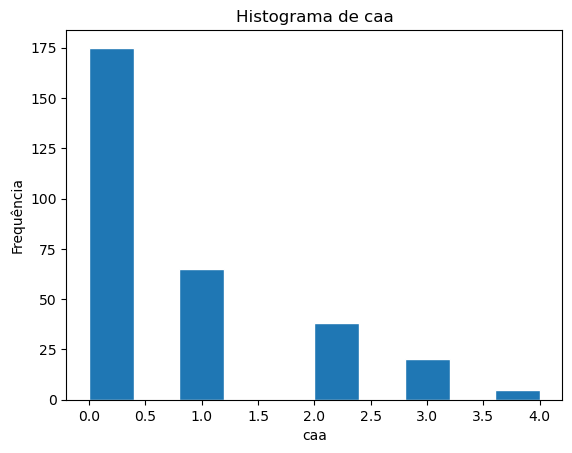

In [5]:
# Separar variáveis numéricas manualmente
vars_numericas = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

# Plotar histograma para as variáveis numéricas
for var in vars_numericas:
    plt.hist(df[var], bins=10,edgecolor="white")
    plt.title('Histograma de ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

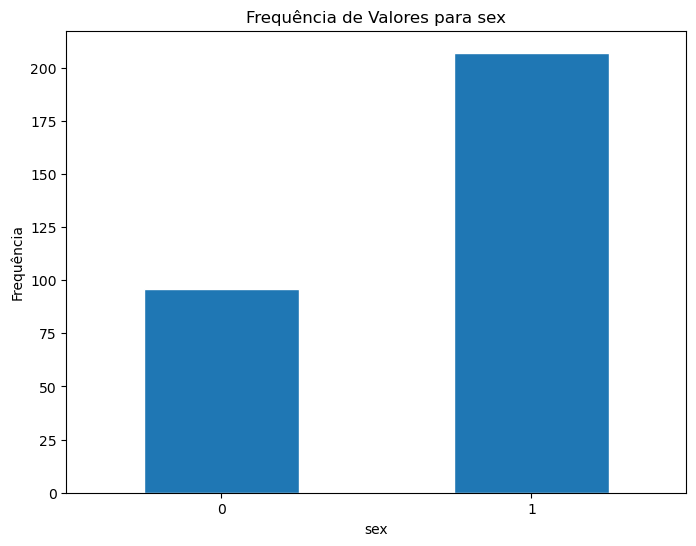

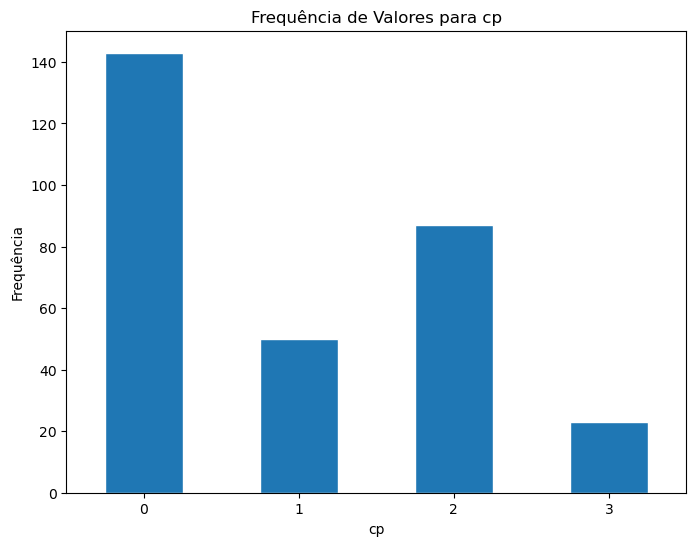

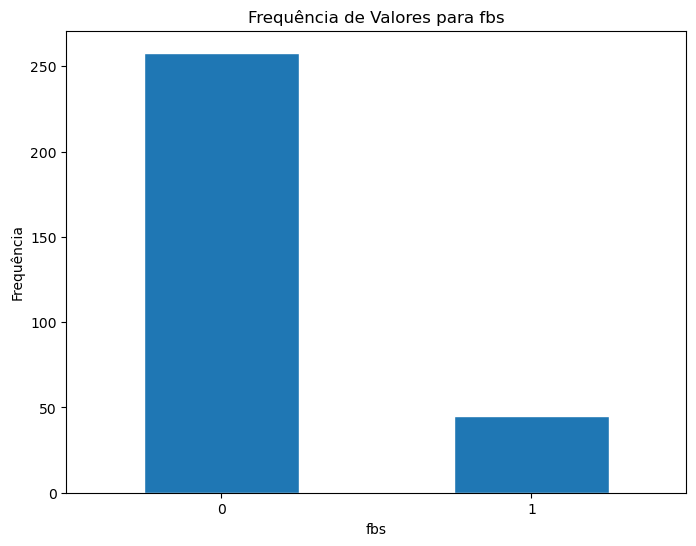

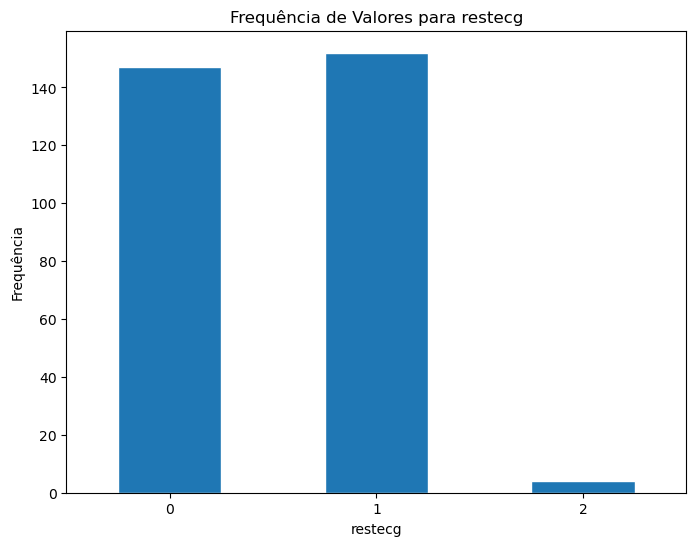

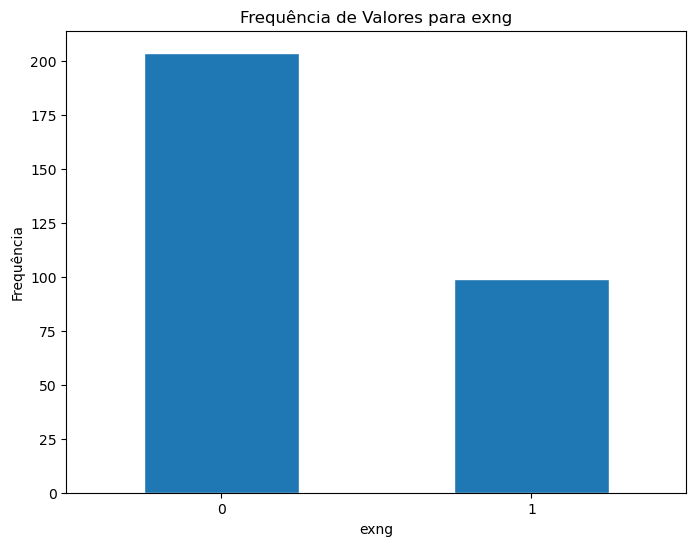

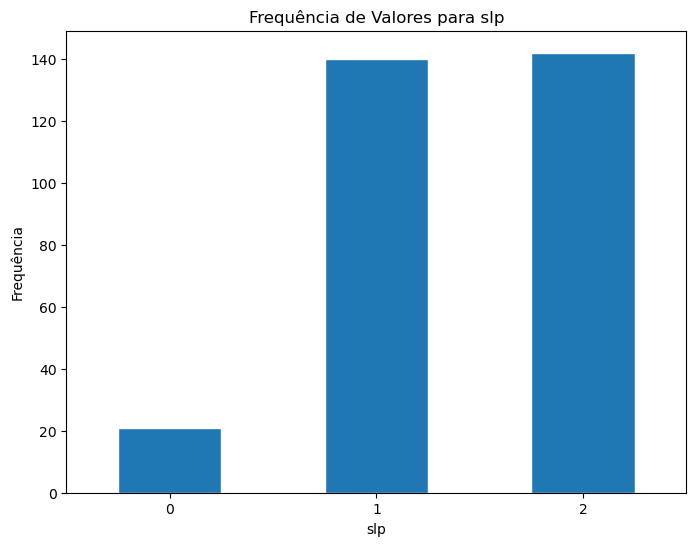

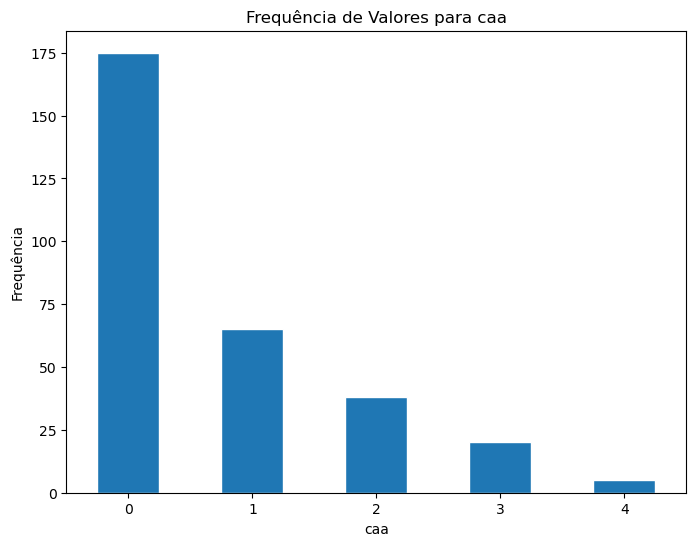

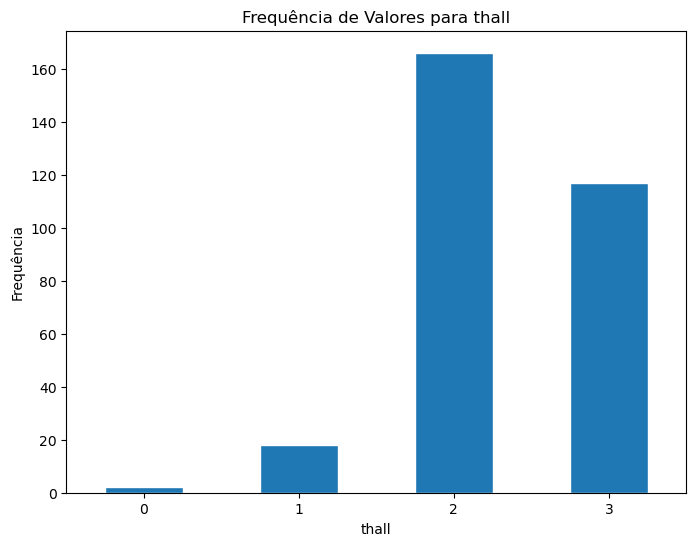

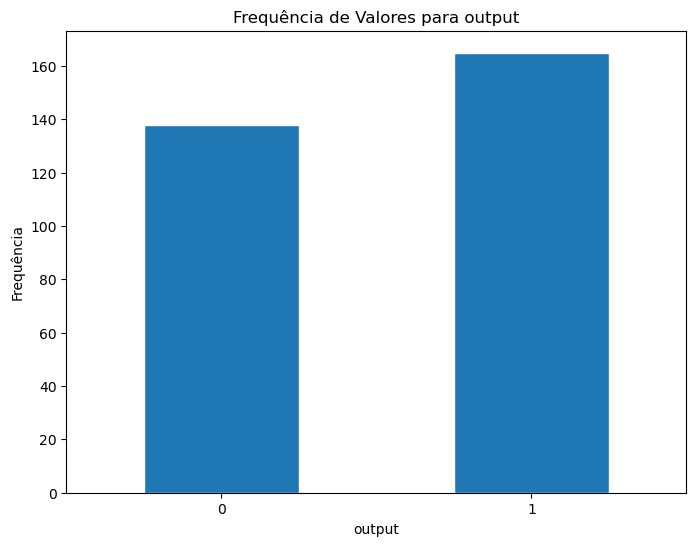

In [6]:
# Variáveis categóricas
variaveis_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Plotar gráficos de frequência para as variáveis categóricas
for var in variaveis_categoricas:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().sort_index().plot(kind='bar', rot=0,edgecolor="white")
    plt.title(f'Frequência de Valores para {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Análise Bivariada (duas ou mais variaveis) Considerando o output como divisor.

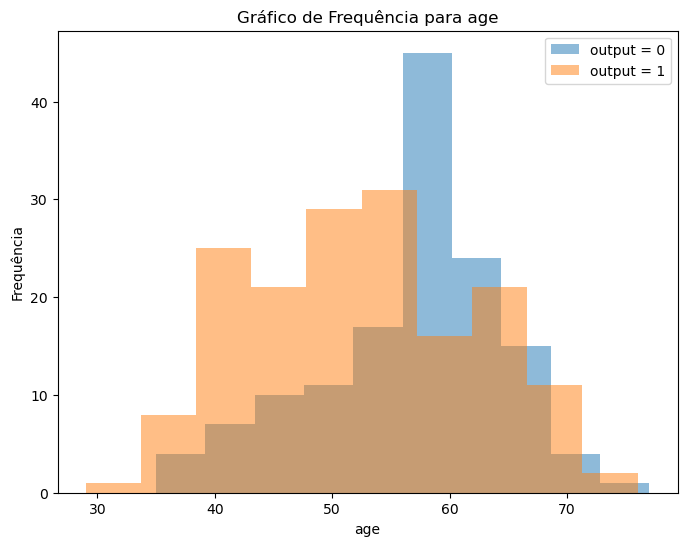

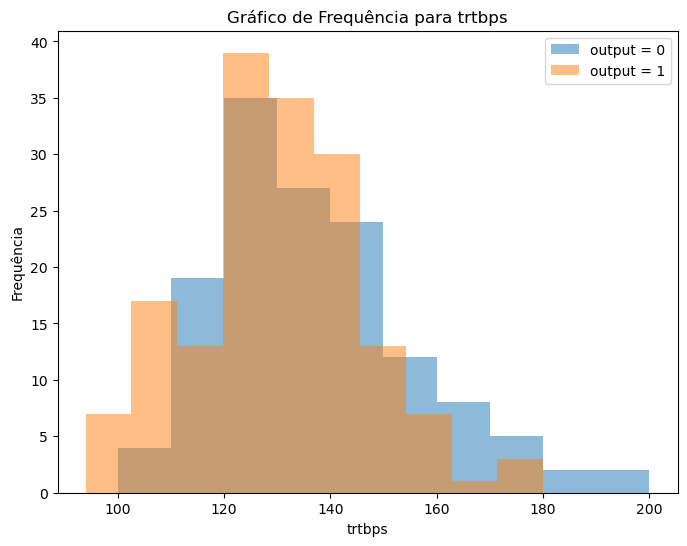

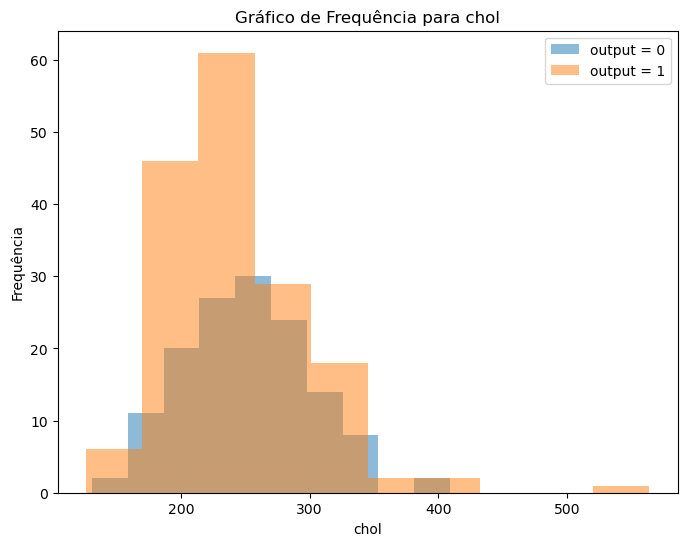

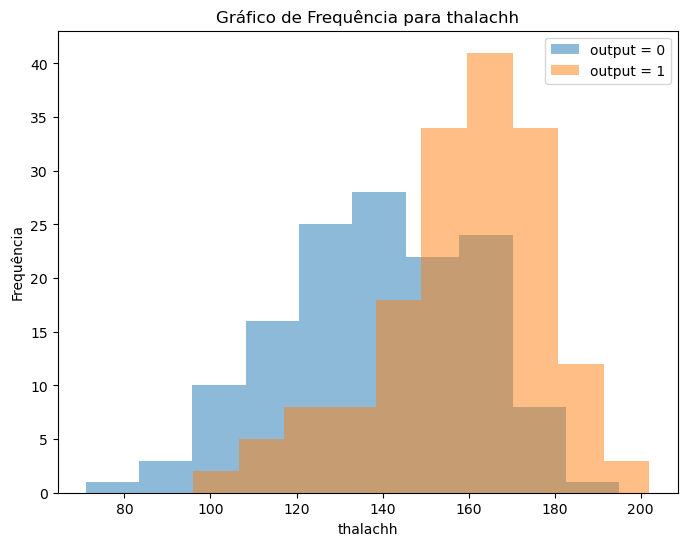

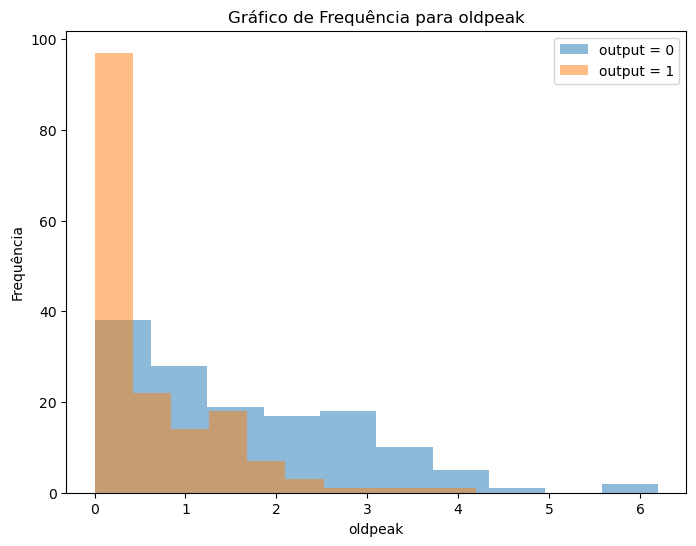

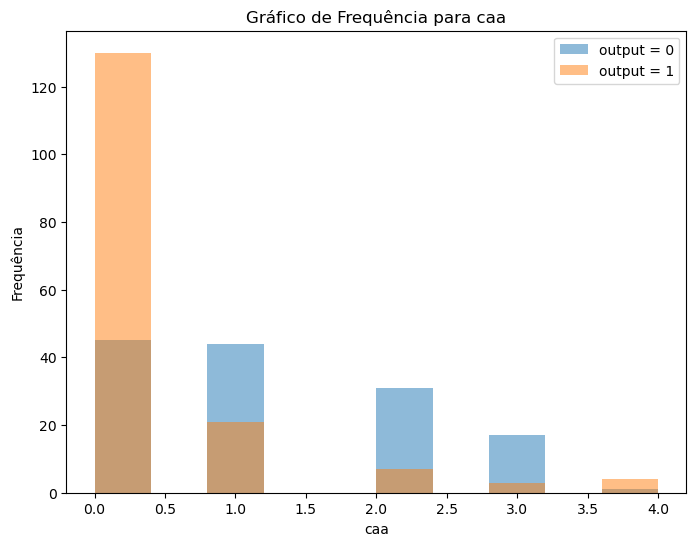

In [7]:
# Variáveis numéricas
variaveis_numericas = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

# Plotar gráfico de frequência para cada variável numérica, considerando o output como divisor
for var in variaveis_numericas:
    plt.figure(figsize=(8, 6))
    df[df['output'] == 0][var].plot(kind='hist', alpha=0.5, label='output = 0')
    df[df['output'] == 1][var].plot(kind='hist', alpha=0.5, label='output = 1')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.title(f'Gráfico de Frequência para {var}')
    plt.legend()
    plt.show()

<Figure size 800x600 with 0 Axes>

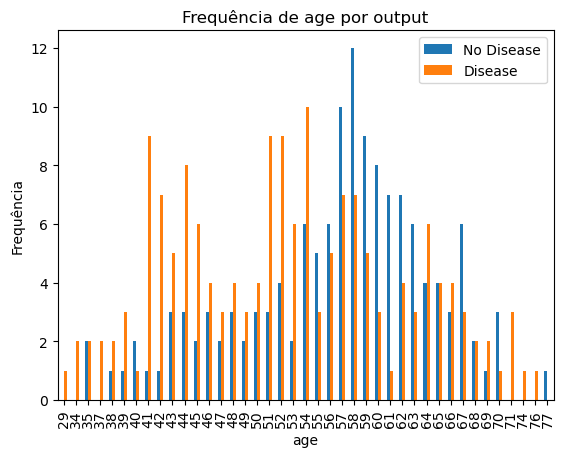

<Figure size 800x600 with 0 Axes>

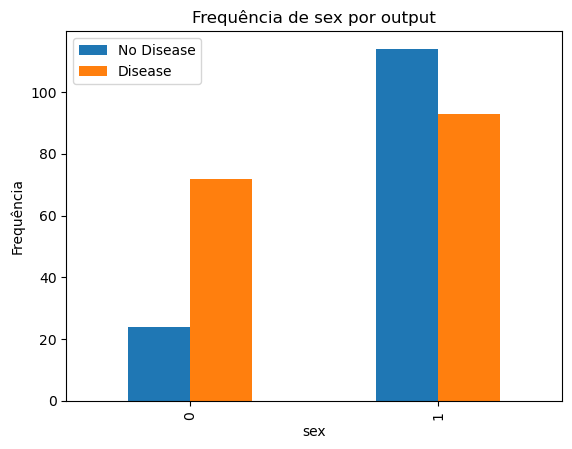

<Figure size 800x600 with 0 Axes>

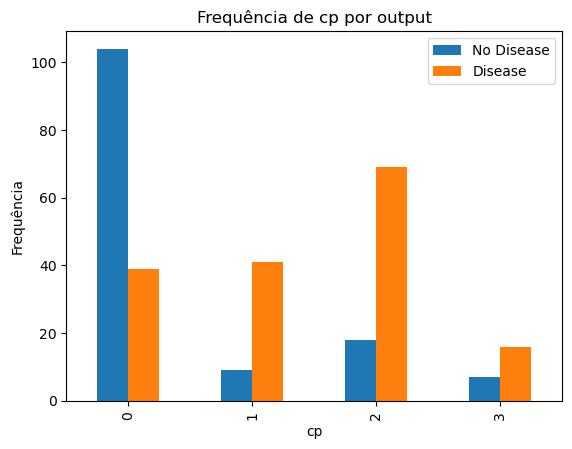

<Figure size 800x600 with 0 Axes>

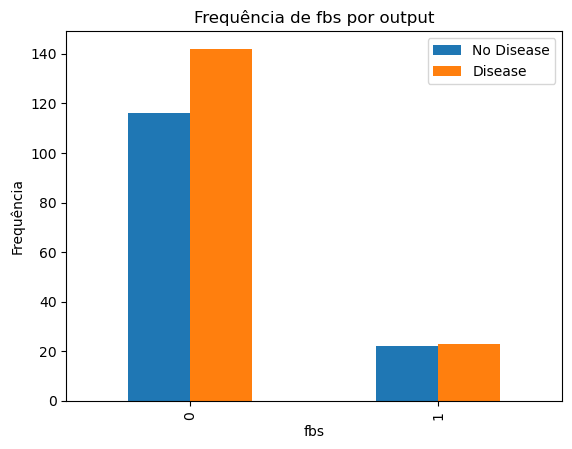

<Figure size 800x600 with 0 Axes>

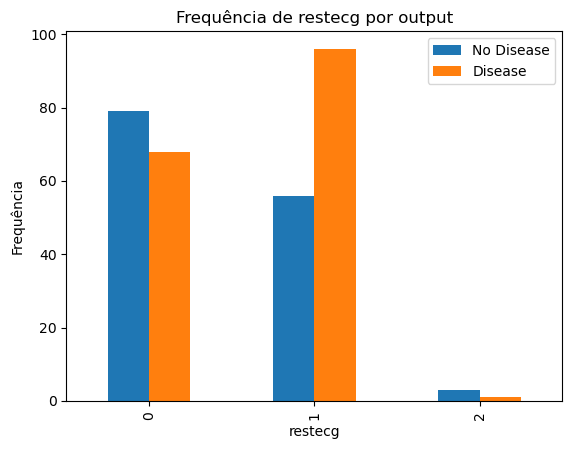

<Figure size 800x600 with 0 Axes>

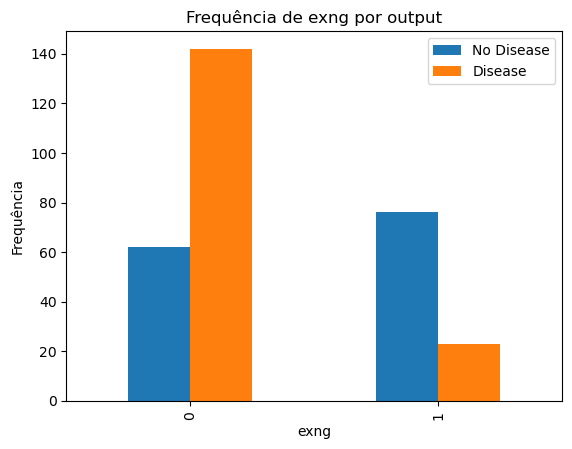

<Figure size 800x600 with 0 Axes>

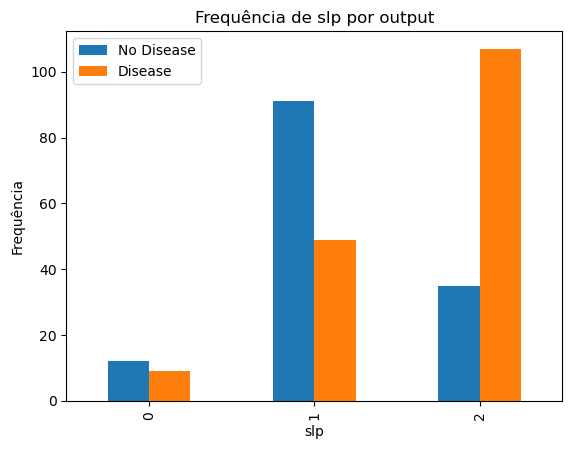

<Figure size 800x600 with 0 Axes>

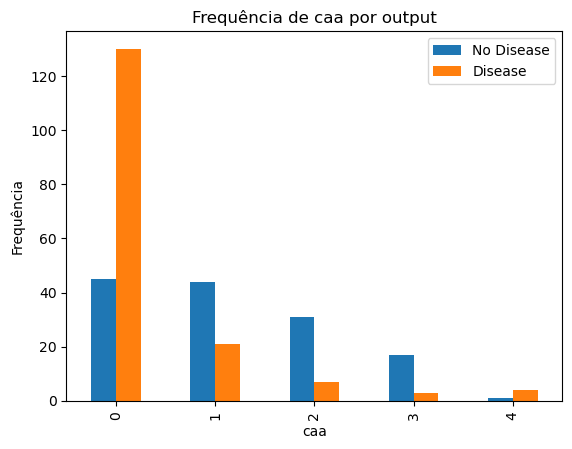

<Figure size 800x600 with 0 Axes>

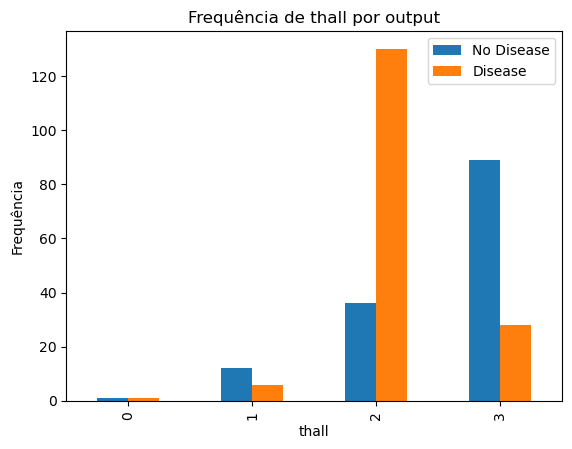

In [8]:
# Variáveis categóricas
categorical_vars = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Plotar gráficos de frequência para as variáveis categóricas
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df.groupby([var, 'output']).size().unstack().plot(kind='bar', stacked=False, linewidth=2)
    plt.title(f'Frequência de {var} por output')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.legend(['No Disease', 'Disease'])
    plt.show()

### Vamos criar um Grafico de correlação para visualizarmos possiveis padrões de correlação em nossa base de dados.

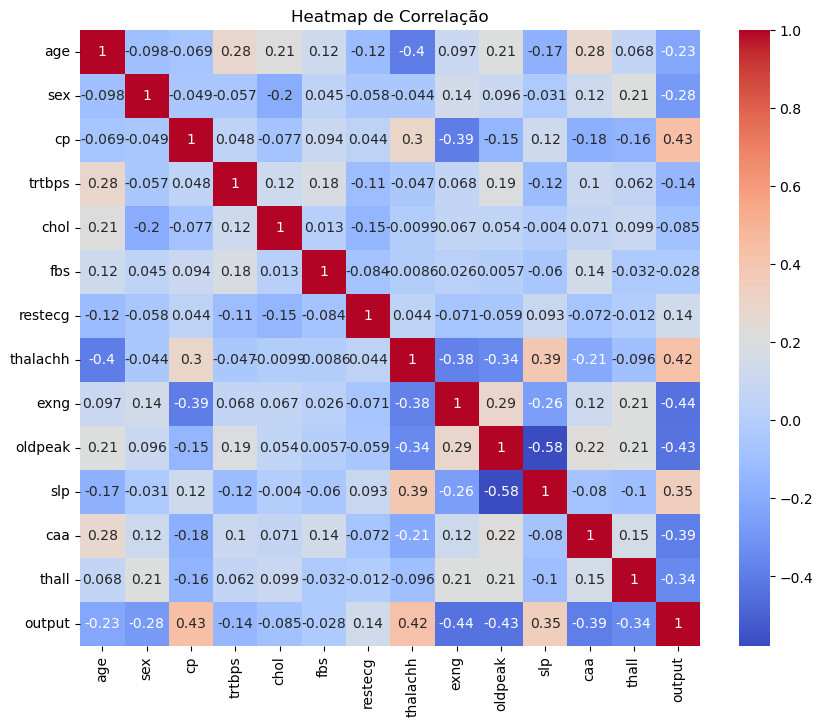

In [9]:
# Cria o heatmap de correlação
corr = df.corr() # Substitua "df" pelo nome do seu dataframe
plt.figure(figsize=(10, 8)) # Define o tamanho da figura
sns.heatmap(corr, annot=True, cmap='coolwarm') # Configura o heatmap
plt.title('Heatmap de Correlação') # Define o título do gráfico
plt.show() # Exibe o gráfico

# Perguntas a serem feitas e respostas

### 1 - Qual é a distribuição de idade dos pacientes que sofreram ataque cardíaco?

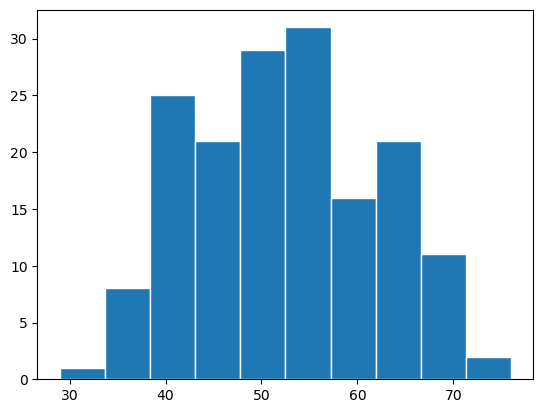

In [10]:
out_1 = df[df['output'] == 1]
out_0 = df[df['output'] == 0]

plt.hist(out_1['age'], bins=10,edgecolor="white")
plt.show()

É notavel que as pessoas de meia idade tendem a sofrer mais de Ataques Cardiacos com base neste dataset.

### 2 - Existe alguma diferença na distribuição de idade entre pacientes do sexo masculino e feminino que sofreram ataque cardíaco?

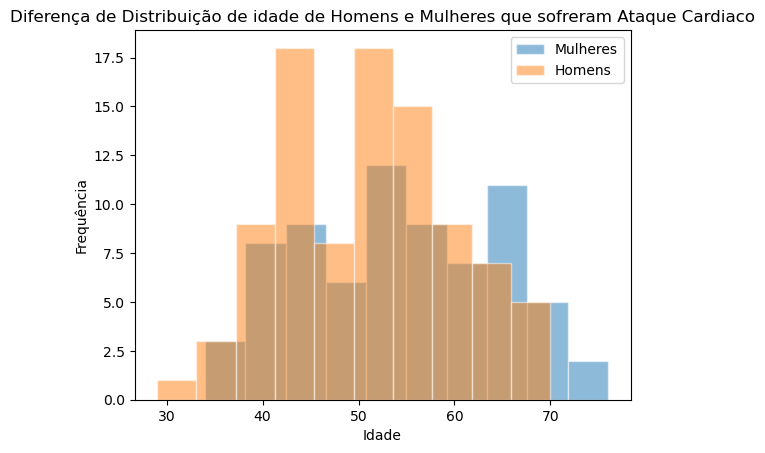

In [11]:
f = out_1[out_1['sex'] == 0]
m = out_1[out_1['sex'] == 1]

plt.hist(f['age'], alpha=0.5, label='Mulheres', edgecolor="white")
plt.hist(m['age'], alpha=0.5, label='Homens', edgecolor="white")
plt.legend(loc='upper right')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Diferença de Distribuição de idade de Homens e Mulheres que sofreram Ataque Cardiaco')
plt.show()

É possivel notar que os homens de meia idade sofreram uma quantidade consideravel a mais de Ataques Cardiacos do que as mulheres.

### 3 - Quais são os fatores de risco mais comuns para ataques cardíacos, com base nas variáveis disponíveis?

Com base no nosso Grafico de Correlação podemos ver algumas medidas como cp(dor no peito) , restecg(batimentos), 	slp(teste ergométrico)

Primeiramente vamos ver o cp(dor no peito), e sua relação com pacientes que sofreram de ataques cardiacos para analisar este fator.

Abaixo temos os valores que representam o significado dos numeros no Grafico abaixo.

cp: tipo de dor no peito (0 = assintomático, 1 = angina típica, 2 = angina atípica, 3 = dor não cardíaca)

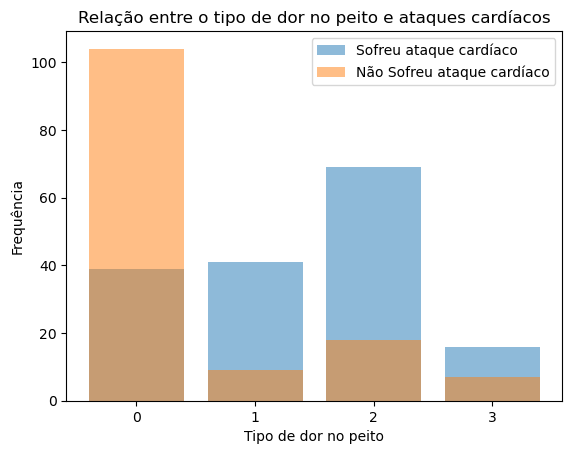

In [12]:
heart_attack = df[df['output'] == 1]
heart_attack_0 = df[df['output'] == 0]


out_1 = heart_attack['cp'].value_counts()
out_0 = heart_attack_0['cp'].value_counts()


plt.bar(out_1.index, out_1.values, alpha=0.5, label='Sofreu ataque cardíaco')
plt.bar(out_0.index, out_0.values, alpha=0.5, label='Não Sofreu ataque cardíaco')
plt.xticks([0, 1, 2, 3])
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Frequência')
plt.title('Relação entre o tipo de dor no peito e ataques cardíacos')
plt.legend()
plt.show()

Agora vamos ver a relaçao com os restecg(batimentos) do paciente, com a relação dos paciente que sofreram de ataque cardiaco

Abaixo temos o significado dos valores que são representados por numeros no grafico plotado abaixo.

restecg: resultados do eletrocardiograma em repouso (0 = normal, 
1 = anormalidades de ST-T (inversão da onda T e elevação ou depressão do segmento ST > 0,05 mV), 
2 = hipertrofia ventricular esquerda provável ou definitiva)

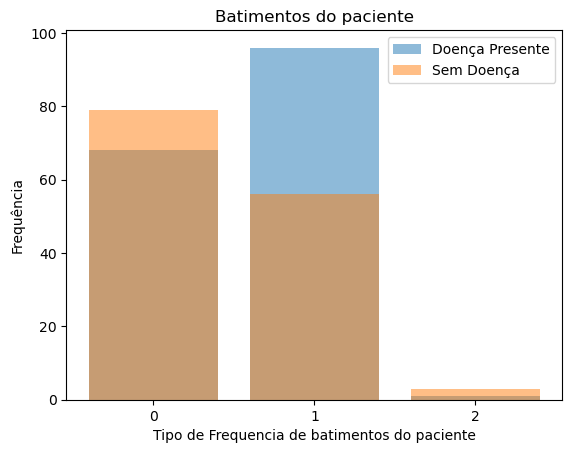

In [26]:
heart_attack = df[df['output'] == 1]
heart_attack_0 = df[df['output'] == 0]


out_1 = heart_attack['restecg'].value_counts()
out_0 = heart_attack_0['restecg'].value_counts()


plt.bar(out_1.index, out_1.values, alpha=0.5, label='Doença Presente')
plt.bar(out_0.index, out_0.values, alpha=0.5, label='Sem Doença')
plt.xticks([0, 1, 2])
plt.xlabel('Tipo de Frequencia de batimentos do paciente')
plt.ylabel('Frequência')
plt.title('Batimentos do paciente')
plt.legend()
plt.show()

Por ultimo vamos ver O segmento ST que é uma parte do eletrocardiograma (ECG) que segue o complexo QRS e precede a onda T. A inclinação do segmento ST durante o exercício é um parâmetro utilizado na avaliação de pacientes que estão sendo submetidos a testes de esforço físico para investigar possíveis problemas cardíacos.

Abaixo temos o significado dos valores que estão representados por numeros no nosso Grafico.

slp: inclinação do segmento ST durante o exercício (0 = descida, 1 = plana, 2 = subida)

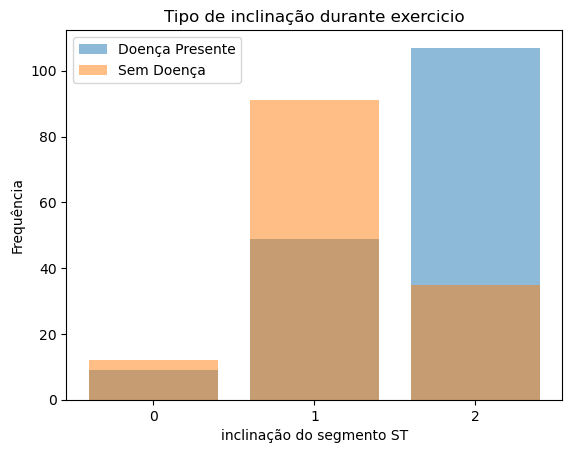

In [25]:
heart_attack = df[df['output'] == 1]
heart_attack_0 = df[df['output'] == 0]


out_1 = heart_attack['slp'].value_counts()
out_0 = heart_attack_0['slp'].value_counts()


plt.bar(out_1.index, out_1.values, alpha=0.5, label='Doença Presente')
plt.bar(out_0.index, out_0.values, alpha=0.5, label='Sem Doença')
plt.xticks([0, 1, 2])
plt.xlabel('inclinação do segmento ST')
plt.ylabel('Frequência')
plt.title('Tipo de inclinação durante exercicio')
plt.legend()
plt.show()

Com base nesses resultados obtidos acima podemos ver os principais sintomas que consistem para um Problema Cardiaco.

### 4 - Existe uma correlação entre a pressão arterial sistólica (trtbps) e o colesterol (chol) dos pacientes?

Para respondermos a esta pergunta, podemos notar no grafico abaixo a relação entre as duas variaveis.

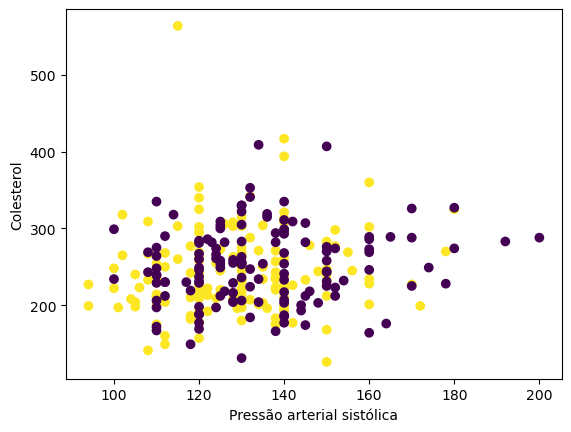

In [17]:
x = df["trtbps"]
y = df["chol"]
colors = df["output"] 

plt.scatter(x, y, c=colors)
plt.xlabel("Pressão arterial sistólica")
plt.ylabel("Colesterol")
plt.show()

Podemos notar que o grafico de dispersão sugere uma correlação positiva entre a pressão arterial sistólica (trtbps) e o colesterol (chol) dos pacientes, ou seja, quanto maior a pressão arterial sistólica, maior tende a ser o nível de colesterol. No entanto, essa correlação não é muito forte, pois podemos ver pontos espalhados no gráfico que indicam que há muita variabilidade nos dados e que a relação não é tão linear.

### 5 - Como a frequência cardíaca máxima alcançada (thalachh) está relacionada com a presença de dor no peito (cp)?

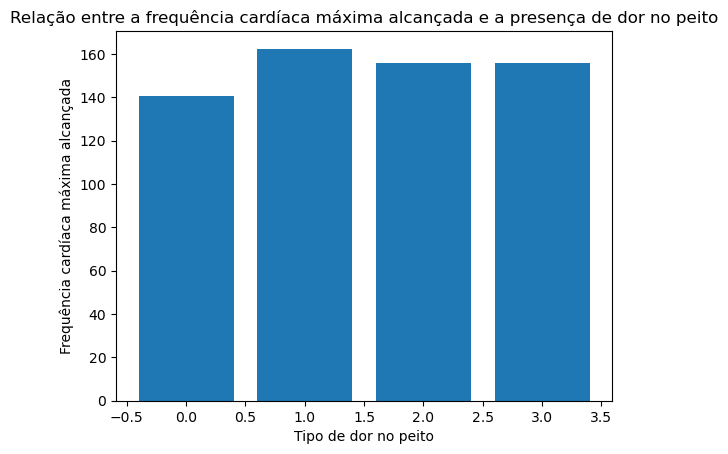

In [18]:
grouped = df.groupby('cp')['thalachh'].mean()

plt.bar(grouped.index, grouped.values)
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Frequência cardíaca máxima alcançada')
plt.title('Relação entre a frequência cardíaca máxima alcançada e a presença de dor no peito')
plt.show()

Se a média da frequência cardíaca máxima for significativamente diferente para cada tipo de dor no peito, podemos concluir que há uma relação entre a frequência cardíaca máxima alcançada e a presença de dor no peito.

Como isto não ocorre podemos concluir que não há uma grande relação entre a Frequencia cardiaca maxima e a presença de dor no peito.

### 6 - É possível identificar um padrão de comportamento de exercício induzido por angina (exng) em relação à presença de doença cardíaca (output)?

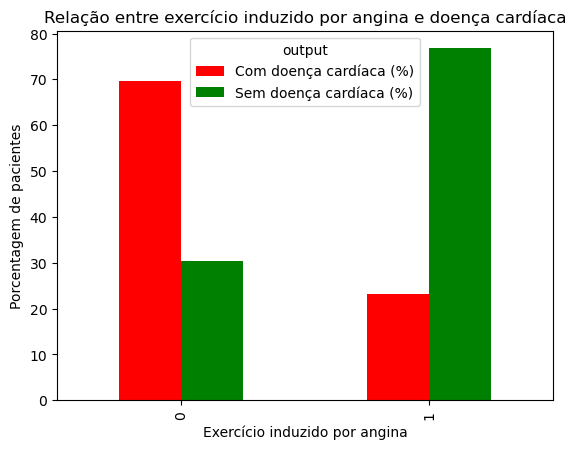

In [19]:
table = pd.crosstab(df['exng'], df['output'])

# Calculando as porcentagens de pacientes com e sem doença cardíaca que apresentaram exercício induzido por angina
table['Com doença cardíaca (%)'] = (table[1]/(table[0]+table[1]))*100
table['Sem doença cardíaca (%)'] = (table[0]/(table[0]+table[1]))*100

# Plotando o gráfico de barras
ax = table[['Com doença cardíaca (%)', 'Sem doença cardíaca (%)']].plot(kind='bar', color=['red', 'green'])
ax.set_xlabel('Exercício induzido por angina')
ax.set_ylabel('Porcentagem de pacientes')
ax.set_title('Relação entre exercício induzido por angina e doença cardíaca')
plt.show()

O gráfico de barras mostra a porcentagem de pacientes com e sem doença cardíaca que apresentaram exercício induzido por angina. É possível visualizar que a presença de exercício induzido por angina está mais presente em pacientes sem doença cardíaca do que em pacientes com doença cardíaca. Por outro lado, a ausência de exercício induzido por angina está mais presente em pacientes com doença cardíaca do que em pacientes sem doença cardíaca. Isso sugere que a presença de exercício induzido por angina pode estar relacionada a um menor risco de desenvolver doença cardíaca. 

### 7 - Existe alguma diferença na distribuição da presença de doença cardíaca em pacientes com e sem histórico de açúcar elevado no sangue (fbs)?

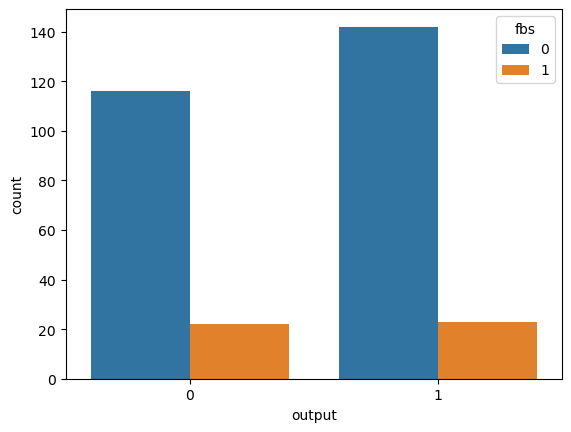

In [20]:
sns.countplot(x='output', hue='fbs', data=df)
plt.show()

In [21]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

Com base no numero de pacientes que sofrem com o seu historico de alto teor de açucar no sangue. Apenas olhando o analisando o grafico podemos tirar a conclusão que metade deles sofrem de doenças cardiacas. 

### 8 - Como as variáveis categóricas, como sexo, número de vasos principais coloridos (caa), e tipo de deficiência thalassemia (thall), estão relacionadas com a presença de doença cardíaca? 

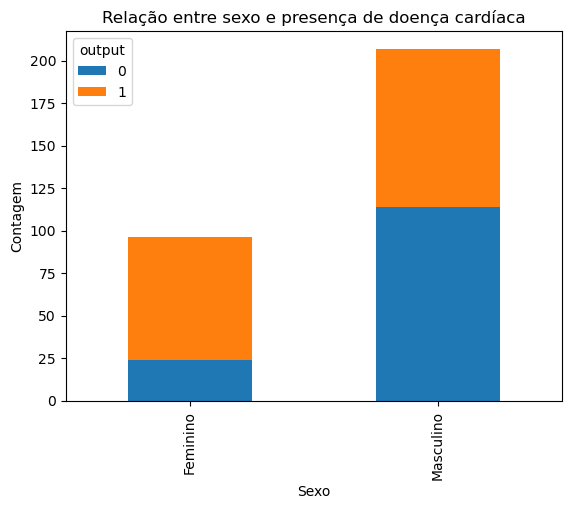

In [22]:
grouped = df.groupby(['sex', 'output'])['age'].count().unstack()

# Plotar gráfico de barras empilhadas
grouped.plot(kind='bar', stacked=True)

# Configurar rótulos e título
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Relação entre sexo e presença de doença cardíaca')
plt.show()

caa: número de grandes vasos sanguíneos coloridos por flourosopia (0-3)

O valor da coluna pode variar de 0 a 3, onde 0 indica que não foram detectados vasos principais coloridos e 1, 2 e 3 indicam a presença de um, dois e três vasos principais coloridos, respectivamente. A detecção de vasos principais coloridos por fluoroscopia pode ser usada para avaliar a presença e a gravidade da doença arterial coronariana, que pode levar a um ataque cardíaco ou outras complicações cardiovasculares.

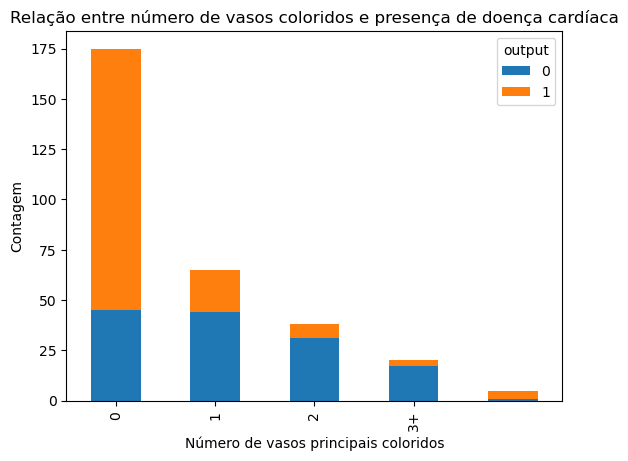

In [23]:
grouped = df.groupby(['caa', 'output'])['age'].count().unstack()

# Plotar gráfico de barras empilhadas
grouped.plot(kind='bar', stacked=True)

# Configurar rótulos e título
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3+'])
plt.xlabel('Número de vasos principais coloridos')
plt.ylabel('Contagem')
plt.title('Relação entre número de vasos coloridos e presença de doença cardíaca')

# Exibir gráfico
plt.show()

A talassemia é um distúrbio sanguíneo hereditário que afeta a produção de hemoglobina, uma proteína que transporta oxigênio pelo sangue. Existem três tipos principais de defeitos da talassemia: thalassemia menor, thalassemia intermediária e thalassemia maior. A coluna "thall" no nosso dataframe codifica os valores 0, 1, 2 e 3, que correspondem aos diferentes tipos de defeitos da talassemia. 0 indica nenhum defeito, 1 indica defeito fixo, 2 indica defeito reversível e 3 indica defeito irreversível.

Note-se que 0 no output significa que o paciente não sofreu doença cardiaca. E 1 que o paciente sofreu da doença.

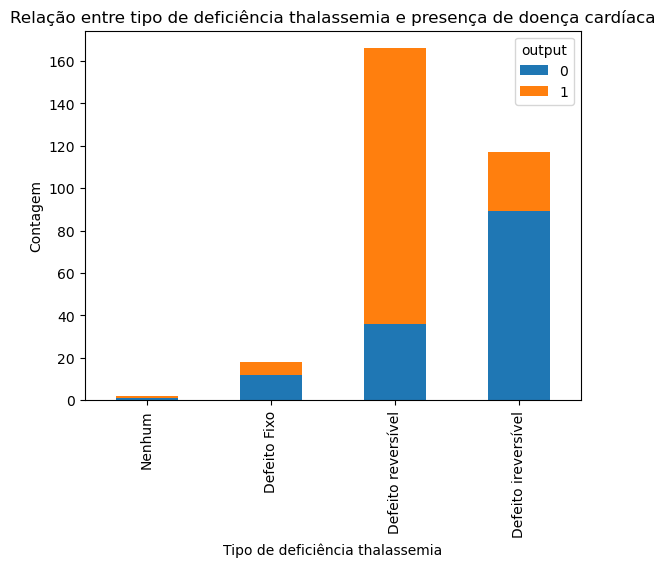

In [24]:
grouped = df.groupby(['thall', 'output'])['age'].count().unstack()

# Plotar gráfico de barras empilhadas
grouped.plot(kind='bar', stacked=True)

# Configurar rótulos e título
plt.xticks([0,1, 2, 3], ['Nenhum','Defeito Fixo', 'Defeito reversível', 'Defeito ireversível'])
plt.xlabel('Tipo de deficiência thalassemia')
plt.ylabel('Contagem')
plt.title('Relação entre tipo de deficiência thalassemia e presença de doença cardíaca')

# Exibir gráfico
plt.show()